# Mounting Google Drive

In [1]:
from google.colab import drive, files
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Loading data

In [2]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 100)

In [3]:
df = pd.read_csv(
    "/content/gdrive/My Drive/Colab Notebooks/faredata/train.csv", 
    index_col="tripid"
)
test_features_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/faredata/test.csv", 
                               index_col="tripid")
print(df.dtypes)
df.head()

additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                         object
dtype: object


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


# Combine Data for Preprocessing

In [4]:
dataframes = [df, test_features_df]
total_df = pd.concat(dataframes)
total_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.00000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.00000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.00000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.66380,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723.0,429.0,24.83332,3.0,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48,NaN
222857785,10.5,1378.0,80.0,0.00000,125.0,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85,NaN
222858416,10.5,418.0,56.0,3.28440,93.0,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79,NaN


# Preprocessing

In [5]:
def set_time_features(df):
    df['pickup_time'] = pd.to_datetime(df['pickup_time'])
    df['drop_time'] = pd.to_datetime(df['drop_time'])
    df['trip_time'] = (df['drop_time'] - df['pickup_time']).dt.total_seconds()
    df['p_hour'] = df.pickup_time.dt.hour
    df['p_day'] = df.pickup_time.dt.day
    df['p_month'] = df.pickup_time.dt.month
    df['p_year'] = df.pickup_time.dt.year
    df['d_hour'] = df.drop_time.dt.hour
    df['d_day'] = df.drop_time.dt.day
    df['d_month'] = df.drop_time.dt.month
    df['d_year'] = df.drop_time.dt.year
    df.drop(columns=['pickup_time', 'drop_time'], inplace=True)

def calculate_distance(lat1, lon1, lat2, lon2):
   # calculating the haversine_distance
   r = 6371 #earth radius in kilometers
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   lamb1 = np.radians(lon1)
   lamb2 = np.radians(lon2)

   delta_phi = phi2 - phi1
   delta_lambda = lamb2 - lamb1
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
   return np.round(res, 3)

def set_trip_distance(df):
    distances = []
    for row in df.itertuples(index=False):
        distances.append(calculate_distance(row.pick_lat, row.pick_lon, row.drop_lat, row.drop_lon))
    
    df['trip_distance'] = distances
    #df.drop(columns=['pick_lat', 'pick_lon', 'drop_lat', 'drop_lon'], inplace=True)

def set_time_error(df):
    time_errors = []
    df['time_error'] = (df['duration'] - df['trip_time'])**2
    #df.drop(columns=['trip_time'], inplace=True)
    #df.drop(columns=['duration', 'trip_time'], inplace=True)

def set_new_features(df):
  fare_per_distance = []
  distance_per_fare = []
  fare_per_time = []
  time_per_fare = []
  fare_per_distance_per_time = []
  waiting_fare_per_time = []
  waiting_fare_per_total_time = [] #with waiting time for pickup
  waiting_time_per_distance = []
  waiting_fare_proportion = []
  additional_fare_per_distance = []
  additional_fare_proportion = []
  speed = []

  feature_df = df.copy()

  fare = feature_df['fare'].values
  distance = feature_df['trip_distance'].values
  trip_time = feature_df['trip_time'].values
  meter_waiting = feature_df['meter_waiting'].values
  waiting_fare = feature_df['meter_waiting_fare'].values
  waiting_till_pickup = feature_df['meter_waiting_till_pickup'].values
  additional_fare = feature_df['additional_fare'].values
  duration = feature_df['duration'].values

  size = len(feature_df)  

  for i in range(size):
    fare_per_distance.append((fare[i]-waiting_fare[i])/distance[i])
    distance_per_fare.append(distance[i]/fare[i])
    fare_per_time.append((fare[i]-waiting_fare[i])/((duration[i]-meter_waiting[i])))
    time_per_fare.append((duration[i]-meter_waiting[i])/fare[i])
    fare_per_distance_per_time.append((fare[i]-waiting_fare[i])*trip_time[i]/distance[i])
    waiting_fare_per_time.append(waiting_fare[i]/meter_waiting[i])
    waiting_fare_per_total_time.append(waiting_fare[i]/((meter_waiting[i]+waiting_till_pickup[i])/60))
    waiting_time_per_distance.append(meter_waiting[i]/duration[i])
    waiting_fare_proportion.append(waiting_fare[i]/(fare[i]+waiting_fare[i])) 
    additional_fare_per_distance.append(additional_fare[i]/distance[i])
    additional_fare_proportion.append(additional_fare[i]/(fare[i]+additional_fare[i]))
    speed.append(distance[i]/((duration[i]-meter_waiting[i])/60))

  feature_df['fare_per_distance'] = fare_per_distance
  feature_df['distance_per_fare'] = distance_per_fare
  feature_df['fare_per_time'] = fare_per_time
  feature_df['time_per_fare'] = time_per_fare
  feature_df['fare_per_distance_per_time'] = fare_per_distance_per_time
  feature_df['waiting_fare_per_time'] = waiting_fare_per_time
  feature_df['waiting_fare_per_total_time'] = waiting_fare_per_total_time
  feature_df['waiting_time_per_distance'] = waiting_time_per_distance
  feature_df['waiting_fare_proportion'] = waiting_fare_proportion
  feature_df['additional_fare_per_distance'] = additional_fare_per_distance
  feature_df['additional_fare_proportion'] = additional_fare_proportion
  feature_df['speed'] = speed 

  return(feature_df)

In [ ]:
total_df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [6]:
set_time_features(total_df)
set_trip_distance(total_df)
set_time_error(total_df)
total_df = set_new_features(total_df)
total_df = total_df.replace([np.inf, -np.inf], np.nan) #removing infinite values in the dataframe
total_df.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in double_sca

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,trip_time,p_hour,p_day,p_month,p_year,d_hour,d_day,d_month,d_year,trip_distance,time_error,fare_per_distance,distance_per_fare,fare_per_time,time_per_fare,fare_per_distance_per_time,waiting_fare_per_time,waiting_fare_per_total_time,waiting_time_per_distance,waiting_fare_proportion,additional_fare_per_distance,additional_fare_proportion,speed
count,25550.000000,25550.000000,25550.000000,25550.000000,25550.000000,25752.000000,25752.000000,25752.000000,25752.000000,25615.000000,25752.000000,25752.000000,25752.000000,25752.000000,25752.000000,25752.000000,25752.000000,25752.000000,25752.000000,25752.000000,2.555000e+04,2.548200e+04,25599.000000,25522.000000,25528.000000,2.548200e+04,24523.000000,25291.000000,25547.000000,25528.000000,25488.000000,25528.000000,25527.000000
mean,12.836354,1648.727710,588.603523,29.578510,114.949432,6.966747,80.001832,6.969061,80.001733,306.167836,1656.691519,13.866379,14.838304,6.084576,2019.559219,14.142902,14.841216,6.083799,2019.559296,4.715616,1.426311e+03,2.770520e+03,0.019702,1.465541,3.768036,1.332964e+07,0.028176,1.209555,0.405680,0.037788,103.140248,0.060393,1.988060
std,80.740418,7463.361635,7377.256541,425.780573,583.965134,0.213136,0.246287,0.334039,0.327857,554.664355,7455.201627,4.820377,8.695963,4.873467,0.496490,4.877650,8.696108,4.873480,0.496481,35.217441,6.304673e+04,3.882327e+04,0.552938,11.775265,2.591643,3.078556e+08,0.028507,1.417613,32.872330,0.065650,961.261037,0.045428,24.403453
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.817700,5.936600,45.307700,0.000000,0.000000,0.000000,1.000000,1.000000,2019.000000,0.000000,1.000000,1.000000,2019.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.336795,-11.719008,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000390,-0.029027
25%,10.500000,545.000000,32.000000,0.000000,26.000000,6.865003,79.870700,6.865428,79.870500,125.715000,540.000000,10.000000,7.000000,2.000000,2019.000000,11.000000,7.000000,2.000000,2019.000000,1.509750,6.400000e+01,4.673495e+01,0.011522,0.215172,3.067031,3.448165e+04,0.000000,0.000000,0.054093,0.000000,1.760859,0.029088,0.197080
50%,10.500000,1000.000000,121.000000,0.000000,72.000000,6.913915,79.899200,6.915905,79.900000,208.730000,1020.000000,14.000000,14.000000,3.000000,2020.000000,14.000000,14.000000,3.000000,2020.000000,3.220500,3.240000e+02,5.647315e+01,0.017085,0.256673,3.738995,6.002134e+04,0.010804,0.000000,0.133929,0.000000,3.351420,0.049194,0.265500
75%,10.500000,1772.000000,346.000000,13.409000,142.000000,7.049340,79.958800,7.053997,79.962800,359.085000,1800.000000,18.000000,22.000000,11.000000,2020.000000,18.000000,22.000000,11.000000,2020.000000,6.113500,9.000000e+02,8.138359e+01,0.020868,0.314816,4.399765,1.143765e+05,0.057881,2.770561,0.268173,0.054097,7.177601,0.077602,0.333772
max,12795.030000,453872.000000,453650.000000,26198.601400,55571.000000,8.425010,81.009600,48.132000,81.009700,26945.990000,453840.000000,23.000000,31.000000,12.000000,2020.000000,23.000000,31.000000,12.000000,2020.000000,5609.521000,7.667361e+06,3.862116e+06,88.464296,453.210000,222.125273,2.409960e+10,0.077067,3.498000,5254.100000,0.497851,60500.000000,0.587735,2016.060000


**Checking for the optimum number of location clusters that  we can categorize the latitudes and longitudes**

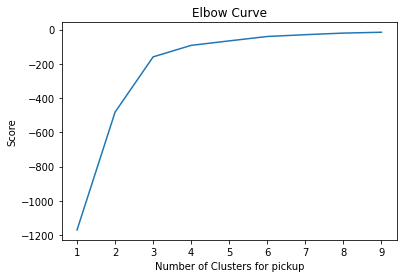

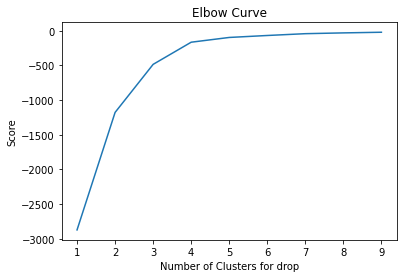

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = total_df[['pick_lat']]
X_axis = total_df[['pick_lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
#Plot the graph for pickup locations
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters for pickup')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Y_axis = total_df[['drop_lat']]
X_axis = total_df[['drop_lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
#Plot the graph for dropped locations
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters for drop')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#Two graphs were levelled after three clusters.
#So we won't be dividing into more than three clusters.

In [8]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(total_df[total_df.columns[5:7]]) # Compute k-means clustering.
total_df['pick_cluster_label'] = kmeans.fit_predict(total_df[total_df.columns[5:7]])
kmeans.fit(total_df[total_df.columns[7:9]])
total_df['drop_cluster_label'] = kmeans.fit_predict(total_df[total_df.columns[7:9]])
total_df.head(10)

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,trip_time,p_hour,p_day,p_month,p_year,d_hour,d_day,d_month,d_year,trip_distance,time_error,fare_per_distance,distance_per_fare,fare_per_time,time_per_fare,fare_per_distance_per_time,waiting_fare_per_time,waiting_fare_per_total_time,waiting_time_per_distance,waiting_fare_proportion,additional_fare_per_distance,additional_fare_proportion,speed,pick_cluster_label,drop_cluster_label
tripid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,6.86252,79.8993,6.90330,79.8783,270.32,correct,840.0,0,1,11,2019,0,1,11,2019,5.093,36.0,53.076772,0.018841,0.347455,2.878070,44584.488514,0.0000,0.000000,0.067146,0.000000,2.061653,0.037390,0.392776,0,0
189125358,10.5,791.0,47.0,0.0000,134.0,6.88589,79.8984,6.91373,79.8923,197.85,correct,780.0,0,1,11,2019,1,1,11,2019,3.168,121.0,62.452652,0.016012,0.265927,3.760425,48713.068182,0.0000,0.000000,0.059418,0.000000,3.314394,0.050396,0.255484,0,0
189125719,10.5,1087.0,80.0,0.0000,61.0,6.90839,79.8651,6.93669,79.9146,301.64,correct,1080.0,1,1,11,2019,1,1,11,2019,6.305,49.0,47.841396,0.020902,0.299543,3.338417,51668.707375,0.0000,0.000000,0.073597,0.000000,1.665345,0.033639,0.375670,0,0
189127273,10.5,598.0,271.0,15.6638,68.0,6.92570,79.8895,6.92748,79.8971,82.30,correct,600.0,2,1,11,2019,2,1,11,2019,0.862,4.0,77.304176,0.010474,0.203780,3.973269,46382.505800,0.0578,2.772354,0.453177,0.159894,12.180974,0.113147,0.158165,0,0
189128020,NaN,NaN,NaN,NaN,NaN,6.87441,79.8615,6.84478,79.9290,358.39,correct,1020.0,3,1,11,2019,3,1,11,2019,8.148,NaN,NaN,0.022735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
189129552,10.5,3407.0,182.0,0.0000,112.0,7.13402,79.8969,6.91865,79.8649,1065.02,correct,3420.0,5,1,11,2019,6,1,11,2019,24.207,169.0,43.996365,0.022729,0.330239,3.028112,150467.567233,0.0000,0.000000,0.053419,0.000000,0.433759,0.009763,0.450363,0,0
189132829,10.5,1246.0,487.0,0.0000,133.0,6.84371,79.9051,6.85069,79.8624,266.62,correct,1200.0,6,1,11,2019,6,1,11,2019,4.778,2116.0,55.801591,0.017921,0.351278,2.846748,66961.908748,0.0000,0.000000,0.390851,0.000000,2.197572,0.037890,0.377708,0,0
189135103,10.5,1333.0,295.0,17.1985,212.0,6.90760,79.9524,6.90634,79.9042,318.05,correct,1320.0,6,1,11,2019,7,1,11,2019,5.323,169.0,56.519162,0.016736,0.289838,3.263638,74605.294007,0.0583,2.035325,0.221305,0.051301,1.972572,0.031959,0.307688,0,0
189139296,10.5,360.0,80.0,4.6640,3.0,7.26706,80.6064,7.27422,80.6124,100.32,correct,360.0,7,1,11,2019,7,1,11,2019,1.035,0.0,92.421256,0.010317,0.341629,2.791069,33271.652174,0.0583,3.371566,0.222222,0.044426,10.144928,0.094748,0.221786,1,2


In [ ]:
for col in total_df.columns:
  print(col, ':', len(total_df[col].unique()))

additional_fare : 30
duration : 4566
meter_waiting : 2243
meter_waiting_fare : 4831
meter_waiting_till_pickup : 776
pick_lat : 17945
pick_lon : 3414
drop_lat : 18294
drop_lon : 3723
fare : 19122
label : 3
trip_time : 312
p_hour : 24
p_day : 31
p_month : 5
p_year : 2
d_hour : 24
d_day : 31
d_month : 5
d_year : 2
trip_distance : 10246
time_error : 864
fare_per_distance : 25367
distance_per_fare : 25421
fare_per_time : 25067
time_per_fare : 25016
fare_per_distance_per_time : 25181
waiting_fare_per_time : 3379
waiting_fare_per_total_time : 10309
waiting_time_per_distance : 21216
waiting_fare_proportion : 12106
additional_fare_per_distance : 12444
additional_fare_proportion : 20075
speed : 25051
pick_cluster_label : 3
drop_cluster_label : 3


**Categorizing Additional Fare**

In [9]:
total_df['additional_fare'] = total_df.additional_fare.astype("category").cat.codes
total_df.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,trip_time,p_hour,p_day,p_month,p_year,d_hour,d_day,d_month,d_year,trip_distance,time_error,fare_per_distance,distance_per_fare,fare_per_time,time_per_fare,fare_per_distance_per_time,waiting_fare_per_time,waiting_fare_per_total_time,waiting_time_per_distance,waiting_fare_proportion,additional_fare_per_distance,additional_fare_proportion,speed,pick_cluster_label,drop_cluster_label
count,25752.000000,25550.000000,25550.000000,25550.000000,25550.000000,25752.000000,25752.000000,25752.000000,25752.000000,25615.000000,25752.000000,25752.000000,25752.000000,25752.000000,25752.000000,25752.000000,25752.000000,25752.000000,25752.000000,25752.000000,2.555000e+04,2.548200e+04,25599.000000,25522.000000,25528.000000,2.548200e+04,24523.000000,25291.000000,25547.000000,25528.000000,25488.000000,25528.000000,25527.000000,25752.000000,25752.000000
mean,3.293997,1648.727710,588.603523,29.578510,114.949432,6.966747,80.001832,6.969061,80.001733,306.167836,1656.691519,13.866379,14.838304,6.084576,2019.559219,14.142902,14.841216,6.083799,2019.559296,4.715616,1.426311e+03,2.770520e+03,0.019702,1.465541,3.768036,1.332964e+07,0.028176,1.209555,0.405680,0.037788,103.140248,0.060393,1.988060,0.173190,0.276367
std,2.202667,7463.361635,7377.256541,425.780573,583.965134,0.213136,0.246287,0.334039,0.327857,554.664355,7455.201627,4.820377,8.695963,4.873467,0.496490,4.877650,8.696108,4.873480,0.496481,35.217441,6.304673e+04,3.882327e+04,0.552938,11.775265,2.591643,3.078556e+08,0.028507,1.417613,32.872330,0.065650,961.261037,0.045428,24.403453,0.422264,0.690170
min,-1.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.817700,5.936600,45.307700,0.000000,0.000000,0.000000,1.000000,1.000000,2019.000000,0.000000,1.000000,1.000000,2019.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.336795,-11.719008,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000390,-0.029027,0.000000,0.000000
25%,3.000000,545.000000,32.000000,0.000000,26.000000,6.865003,79.870700,6.865428,79.870500,125.715000,540.000000,10.000000,7.000000,2.000000,2019.000000,11.000000,7.000000,2.000000,2019.000000,1.509750,6.400000e+01,4.673495e+01,0.011522,0.215172,3.067031,3.448165e+04,0.000000,0.000000,0.054093,0.000000,1.760859,0.029088,0.197080,0.000000,0.000000
50%,3.000000,1000.000000,121.000000,0.000000,72.000000,6.913915,79.899200,6.915905,79.900000,208.730000,1020.000000,14.000000,14.000000,3.000000,2020.000000,14.000000,14.000000,3.000000,2020.000000,3.220500,3.240000e+02,5.647315e+01,0.017085,0.256673,3.738995,6.002134e+04,0.010804,0.000000,0.133929,0.000000,3.351420,0.049194,0.265500,0.000000,0.000000
75%,3.000000,1772.000000,346.000000,13.409000,142.000000,7.049340,79.958800,7.053997,79.962800,359.085000,1800.000000,18.000000,22.000000,11.000000,2020.000000,18.000000,22.000000,11.000000,2020.000000,6.113500,9.000000e+02,8.138359e+01,0.020868,0.314816,4.399765,1.143765e+05,0.057881,2.770561,0.268173,0.054097,7.177601,0.077602,0.333772,0.000000,0.000000
max,28.000000,453872.000000,453650.000000,26198.601400,55571.000000,8.425010,81.009600,48.132000,81.009700,26945.990000,453840.000000,23.000000,31.000000,12.000000,2020.000000,23.000000,31.000000,12.000000,2020.000000,5609.521000,7.667361e+06,3.862116e+06,88.464296,453.210000,222.125273,2.409960e+10,0.077067,3.498000,5254.100000,0.497851,60500.000000,0.587735,2016.060000,2.000000,2.000000


In [ ]:
total_df.isnull().sum()

additional_fare                    0
duration                         202
meter_waiting                    202
meter_waiting_fare               202
meter_waiting_till_pickup        202
pick_lat                           0
pick_lon                           0
drop_lat                           0
drop_lon                           0
fare                             137
label                           8576
trip_time                          0
p_hour                             0
p_day                              0
p_month                            0
p_year                             0
d_hour                             0
d_day                              0
d_month                            0
d_year                             0
trip_distance                      0
time_error                       202
fare_per_distance                270
distance_per_fare                153
fare_per_time                    230
time_per_fare                    224
fare_per_distance_per_time       270
w

In [ ]:
total_df.dtypes

additional_fare                    int8
duration                        float64
meter_waiting                   float64
meter_waiting_fare              float64
meter_waiting_till_pickup       float64
pick_lat                        float64
pick_lon                        float64
drop_lat                        float64
drop_lon                        float64
fare                            float64
label                            object
trip_time                       float64
p_hour                            int64
p_day                             int64
p_month                           int64
p_year                            int64
d_hour                            int64
d_day                             int64
d_month                           int64
d_year                            int64
trip_distance                   float64
time_error                      float64
fare_per_distance               float64
distance_per_fare               float64
fare_per_time                   float64


In [ ]:
total_df.shape

(25752, 36)

# Splitting to Training and Testing data sets

In [10]:
test = total_df.loc[213284604:222860703]
test = test.drop(['label'], axis=1)

In [ ]:
test.shape

(8576, 35)

In [12]:
train = total_df.loc[189123628:213817296]
train.head() 

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,trip_time,p_hour,p_day,p_month,p_year,d_hour,d_day,d_month,d_year,trip_distance,time_error,fare_per_distance,distance_per_fare,fare_per_time,time_per_fare,fare_per_distance_per_time,waiting_fare_per_time,waiting_fare_per_total_time,waiting_time_per_distance,waiting_fare_proportion,additional_fare_per_distance,additional_fare_proportion,speed,pick_cluster_label,drop_cluster_label
tripid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
189123628,3,834.0,56.0,0.0000,64.0,6.86252,79.8993,6.90330,79.8783,270.32,correct,840.0,0,1,11,2019,0,1,11,2019,5.093,36.0,53.076772,0.018841,0.347455,2.878070,44584.488514,0.0000,0.000000,0.067146,0.000000,2.061653,0.037390,0.392776,0,0
189125358,3,791.0,47.0,0.0000,134.0,6.88589,79.8984,6.91373,79.8923,197.85,correct,780.0,0,1,11,2019,1,1,11,2019,3.168,121.0,62.452652,0.016012,0.265927,3.760425,48713.068182,0.0000,0.000000,0.059418,0.000000,3.314394,0.050396,0.255484,0,0
189125719,3,1087.0,80.0,0.0000,61.0,6.90839,79.8651,6.93669,79.9146,301.64,correct,1080.0,1,1,11,2019,1,1,11,2019,6.305,49.0,47.841396,0.020902,0.299543,3.338417,51668.707375,0.0000,0.000000,0.073597,0.000000,1.665345,0.033639,0.375670,0,0
189127273,3,598.0,271.0,15.6638,68.0,6.92570,79.8895,6.92748,79.8971,82.30,correct,600.0,2,1,11,2019,2,1,11,2019,0.862,4.0,77.304176,0.010474,0.203780,3.973269,46382.505800,0.0578,2.772354,0.453177,0.159894,12.180974,0.113147,0.158165,0,0
189128020,-1,NaN,NaN,NaN,NaN,6.87441,79.8615,6.84478,79.9290,358.39,correct,1020.0,3,1,11,2019,3,1,11,2019,8.148,NaN,NaN,0.022735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


# Removing Outliers

In [ ]:
from scipy import stats

def remove_outliers(df):
  outlier_features = ['duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'fare']
  droped_df = df
  indexes = []
  for i in outlier_features:
    droped_df[i].fillna(-1, inplace=True)
    z = np.abs(stats.zscore(df[i]))
    indexes = indexes + np.where(z > 4)[0].tolist()
  
  indexes = list(dict.fromkeys(indexes))  
  print(indexes)
  droped_df = droped_df.drop(indexes)
  print(droped_df.shape)

  return(droped_df)

In [ ]:
rout = train.copy()
rout = rout.reset_index()
rout = remove_outliers(rout)
rout.index = rout['tripid']
rout = rout.drop(['tripid'], axis=1)
rout.shape
train = rout.copy()

[74, 280, 467, 694, 1194, 1732, 1885, 1996, 2632, 3031, 3067, 3365, 3389, 3397, 3572, 3633, 3793, 3827, 3977, 3987, 4088, 4193, 4284, 4630, 4737, 4807, 4819, 4898, 5000, 5379, 5437, 5736, 5785, 6371, 6764, 7011, 7375, 7415, 8250, 8409, 9077, 9846, 9982, 11345, 11560, 12193, 12358, 13055, 14045, 14437, 14932, 14947, 16121, 16759, 14043, 1761, 2115, 2847, 2955, 3690, 7872, 8923, 10495, 11353, 13044, 14687, 15292, 16218, 410, 486, 1765, 2042, 2086, 3680, 3733, 3859, 4090, 5192, 5339, 5581, 6275, 6498, 6535, 6770, 6777, 7256, 8464, 8801, 9093, 9896, 10286, 10537, 10839, 10921, 10993, 11226, 11598, 11849, 13047, 14137, 14138, 14443, 15451, 16811]
(17072, 37)


(17072, 36)

# Creating and Encoding Label dataset

In [13]:
label_df = pd.DataFrame(train['label'])
train = train.drop(columns='label')
train.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,trip_time,p_hour,p_day,p_month,p_year,d_hour,d_day,d_month,d_year,trip_distance,time_error,fare_per_distance,distance_per_fare,fare_per_time,time_per_fare,fare_per_distance_per_time,waiting_fare_per_time,waiting_fare_per_total_time,waiting_time_per_distance,waiting_fare_proportion,additional_fare_per_distance,additional_fare_proportion,speed,pick_cluster_label,drop_cluster_label
tripid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
189123628,3,834.0,56.0,0.0000,64.0,6.86252,79.8993,6.90330,79.8783,270.32,840.0,0,1,11,2019,0,1,11,2019,5.093,36.0,53.076772,0.018841,0.347455,2.878070,44584.488514,0.0000,0.000000,0.067146,0.000000,2.061653,0.037390,0.392776,0,0
189125358,3,791.0,47.0,0.0000,134.0,6.88589,79.8984,6.91373,79.8923,197.85,780.0,0,1,11,2019,1,1,11,2019,3.168,121.0,62.452652,0.016012,0.265927,3.760425,48713.068182,0.0000,0.000000,0.059418,0.000000,3.314394,0.050396,0.255484,0,0
189125719,3,1087.0,80.0,0.0000,61.0,6.90839,79.8651,6.93669,79.9146,301.64,1080.0,1,1,11,2019,1,1,11,2019,6.305,49.0,47.841396,0.020902,0.299543,3.338417,51668.707375,0.0000,0.000000,0.073597,0.000000,1.665345,0.033639,0.375670,0,0
189127273,3,598.0,271.0,15.6638,68.0,6.92570,79.8895,6.92748,79.8971,82.30,600.0,2,1,11,2019,2,1,11,2019,0.862,4.0,77.304176,0.010474,0.203780,3.973269,46382.505800,0.0578,2.772354,0.453177,0.159894,12.180974,0.113147,0.158165,0,0
189128020,-1,NaN,NaN,NaN,NaN,6.87441,79.8615,6.84478,79.9290,358.39,1020.0,3,1,11,2019,3,1,11,2019,8.148,NaN,NaN,0.022735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [14]:
label_df['label_copy'] = label_df['label']
labels ={"label": {"correct": 1, "incorrect": 0}}
label_df.replace(labels, inplace=True)
label_df.drop(columns='label_copy', inplace=True)
label_df.head()

,label
tripid,
189123628,1
189125358,1
189125719,1
189127273,1
189128020,1


In [15]:
label_df['label'].value_counts()

1    15495
0     1681
Name: label, dtype: int64

# Handle NaN Values

In [ ]:
#don't execute this block as model handels them internally
def fillnas(td_preprocess):
  td_preprocess['additional_fare'].fillna(-1, inplace=True)
  td_preprocess['duration'].fillna(-1, inplace=True)
  td_preprocess['meter_waiting'].fillna(-1, inplace=True)
  td_preprocess['meter_waiting_till_pickup'].fillna(-1, inplace=True)

fillnas(train)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Data Visualization

In [16]:
cont_df = train.copy()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
data = imputer.fit_transform(cont_df)
cont_df = pd.DataFrame(data, columns = cont_df.columns)
cont_df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,trip_time,p_hour,p_day,p_month,p_year,d_hour,d_day,d_month,d_year,trip_distance,time_error,fare_per_distance,distance_per_fare,fare_per_time,time_per_fare,fare_per_distance_per_time,waiting_fare_per_time,waiting_fare_per_total_time,waiting_time_per_distance,waiting_fare_proportion,additional_fare_per_distance,additional_fare_proportion,speed,pick_cluster_label,drop_cluster_label
0,3.0,834.000000,56.000000,0.000000,64.000000,6.86252,79.8993,6.90330,79.8783,270.32,840.0,0.0,1.0,11.0,2019.0,0.0,1.0,11.0,2019.0,5.093,36.000000,53.076772,0.018841,0.347455,2.878070,4.458449e+04,0.000000,0.000000,0.067146,0.000000,2.061653,0.037390,0.392776,0.0,0.0
1,3.0,791.000000,47.000000,0.000000,134.000000,6.88589,79.8984,6.91373,79.8923,197.85,780.0,0.0,1.0,11.0,2019.0,1.0,1.0,11.0,2019.0,3.168,121.000000,62.452652,0.016012,0.265927,3.760425,4.871307e+04,0.000000,0.000000,0.059418,0.000000,3.314394,0.050396,0.255484,0.0,0.0
2,3.0,1087.000000,80.000000,0.000000,61.000000,6.90839,79.8651,6.93669,79.9146,301.64,1080.0,1.0,1.0,11.0,2019.0,1.0,1.0,11.0,2019.0,6.305,49.000000,47.841396,0.020902,0.299543,3.338417,5.166871e+04,0.000000,0.000000,0.073597,0.000000,1.665345,0.033639,0.375670,0.0,0.0
3,3.0,598.000000,271.000000,15.663800,68.000000,6.92570,79.8895,6.92748,79.8971,82.30,600.0,2.0,1.0,11.0,2019.0,2.0,1.0,11.0,2019.0,0.862,4.000000,77.304176,0.010474,0.203780,3.973269,4.638251e+04,0.057800,2.772354,0.453177,0.159894,12.180974,0.113147,0.158165,0.0,0.0
4,-1.0,1702.858077,629.074231,32.057666,112.466832,6.87441,79.8615,6.84478,79.9290,358.39,1020.0,3.0,1.0,11.0,2019.0,3.0,1.0,11.0,2019.0,8.148,1551.730117,2700.917140,0.022735,1.315718,3.831566,1.220294e+07,0.029266,1.256661,0.510764,0.038843,110.165283,0.062128,1.980043,0.0,0.0


In [17]:
labels = label_df.copy()
features = cont_df.copy()

In [ ]:
(features.shape, labels.shape)

((17176, 35), (17176, 1))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


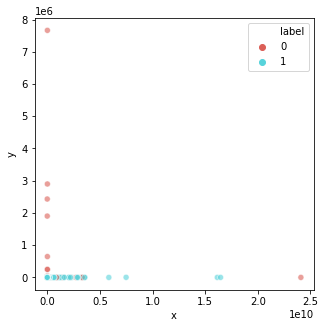

In [18]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

imputer = SimpleImputer()
plotdata = imputer.fit_transform(features)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(plotdata)

temp_df = pd.DataFrame({'x': pca_result[:,0], 'y': pca_result[:,1], 'label': labels['label']})

# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(temp_df.shape[0])

plt.figure(figsize=(5,5))
sns.scatterplot(
    x="x", y="y",
    hue="label",
    palette=sns.color_palette("hls", 2),
    data=temp_df,
    legend="full",
    alpha=0.6
)

# Import Models

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
!pip install catboost
from catboost import Pool, CatBoostClassifier, cv

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import f1_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

     |████████████████████████████████| 64.8MB 61kB/s 


# Imputer and Scaler

In [ ]:
#Don't execute with XGBoost or CatBoost Classifiers
#Execute only for selecting best model in the below code section

# chain preprocessing into a Pipeline object
# SimpleImputer(strategy='median', add_indicator=False) - RandomForest model
# SimpleImputer(strategy='median', add_indicator=True) - LogisticRegression

preprocessor = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='median', add_indicator=False)),
    ('scaler', MinMaxScaler())
])


# Selecting Best Model

In [ ]:
models = [
    RandomForestClassifier(class_weight={1: 0.8, 0: 0.2}, criterion='entropy', max_depth=15, max_features=5, min_impurity_decrease=0, n_estimators=300, random_state=6),
    LogisticRegression(C=100, class_weight={1: 0.2, 0: 0.8}, max_iter=100, penalty='l1', solver='liblinear', random_state=0, n_jobs=-1),
    MultinomialNB(),
    BernoulliNB(),
    LogisticRegression(random_state=0),
    SGDClassifier(),
    LinearSVC(),
    XGBClassifier(),
    CatBoostClassifier()
]

processed_models = {}
for model in models:
    name = model.__class__.__name__
    '''processed_models[name] = Pipeline([("preprocessor", preprocessor),
                                      ("estimator", model)])'''
    processed_models[name] = Pipeline([("estimator", model)])
    
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for (name, model) in processed_models.items():
  f1_scores = cross_val_score(model, features, labels.label, scoring='f1_macro', cv=CV)
  for fold_idx, f1 in enumerate(f1_scores):
    entries.append((name, fold_idx, f1))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'f1_score'])

print(cv_df)
print(cv_df.groupby('model_name').f1_score.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn

Streaming output truncated to the last 5000 lines.
56:	learn: 0.1533873	total: 926ms	remaining: 15.3s
57:	learn: 0.1525340	total: 942ms	remaining: 15.3s
58:	learn: 0.1517806	total: 958ms	remaining: 15.3s
59:	learn: 0.1509933	total: 974ms	remaining: 15.3s
60:	learn: 0.1504305	total: 990ms	remaining: 15.2s
61:	learn: 0.1495997	total: 1s	remaining: 15.2s
62:	learn: 0.1491661	total: 1.02s	remaining: 15.2s
63:	learn: 0.1482658	total: 1.03s	remaining: 15.2s
64:	learn: 0.1476722	total: 1.05s	remaining: 15.2s
65:	learn: 0.1469934	total: 1.07s	remaining: 15.1s
66:	learn: 0.1466981	total: 1.08s	remaining: 15.1s
67:	learn: 0.1462917	total: 1.1s	remaining: 15.1s
68:	learn: 0.1455725	total: 1.12s	remaining: 15.1s
69:	learn: 0.1451948	total: 1.13s	remaining: 15.1s
70:	learn: 0.1446173	total: 1.15s	remaining: 15s
71:	learn: 0.1442367	total: 1.17s	remaining: 15s
72:	learn: 0.1437472	total: 1.18s	remaining: 15s
73:	learn: 0.1433836	total: 1.2s	remaining: 15s
74:	learn: 0.1428849	total: 1.21s	remaining:

# Split the Validation dataset

In [20]:
labels = label_df.copy()
features = train.copy()

In [21]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features,
    labels,
    test_size=0.33,
    shuffle=True,
    stratify=labels,
    random_state=RANDOM_SEED
)

# Without Using Pipeline

In [22]:
categorical_features_indices = np.where(features.dtypes != np.float)[0]
print(categorical_features_indices)

[ 0 11 12 13 14 15 16 17 18 33 34]


Early Stopping is done to reduce Overfitting

In [23]:
model = CatBoostClassifier(iterations = 2000,
  thread_count = 10,
  loss_function = "Logloss",
  depth = 6,
  learning_rate = 0.03,
  od_type = "Iter",
  od_wait = 100)

# Train & Validation

In [24]:
model.fit(X_train, y_train, categorical_features_indices)

0:	learn: 0.6546212	total: 94.9ms	remaining: 3m 9s
1:	learn: 0.6168286	total: 168ms	remaining: 2m 47s
2:	learn: 0.5840038	total: 226ms	remaining: 2m 30s
3:	learn: 0.5500350	total: 286ms	remaining: 2m 22s
4:	learn: 0.5164827	total: 350ms	remaining: 2m 19s
5:	learn: 0.4861132	total: 405ms	remaining: 2m 14s
6:	learn: 0.4622539	total: 461ms	remaining: 2m 11s
7:	learn: 0.4378296	total: 520ms	remaining: 2m 9s
8:	learn: 0.4144216	total: 597ms	remaining: 2m 11s
9:	learn: 0.3918483	total: 664ms	remaining: 2m 12s
10:	learn: 0.3740493	total: 736ms	remaining: 2m 13s
11:	learn: 0.3572560	total: 788ms	remaining: 2m 10s
12:	learn: 0.3421250	total: 854ms	remaining: 2m 10s
13:	learn: 0.3264819	total: 926ms	remaining: 2m 11s
14:	learn: 0.3133907	total: 985ms	remaining: 2m 10s
15:	learn: 0.3004345	total: 1.05s	remaining: 2m 10s
16:	learn: 0.2913009	total: 1.11s	remaining: 2m 9s
17:	learn: 0.2816940	total: 1.17s	remaining: 2m 8s
18:	learn: 0.2716365	total: 1.22s	remaining: 2m 7s
19:	learn: 0.2629499	total

In [25]:
preds = model.predict(X_eval)
print(preds)

[1 1 1 ... 1 1 1]


In [26]:
print("F1_Score: {}".format(f1_score(y_eval, preds)))
print("Macro F1_Score: {}".format(f1_score(y_eval, preds, average='macro')))

F1_Score: 0.9771125060357315
Macro F1_Score: 0.8680069142589645


Text(0.5, 15.0, 'Predicted')

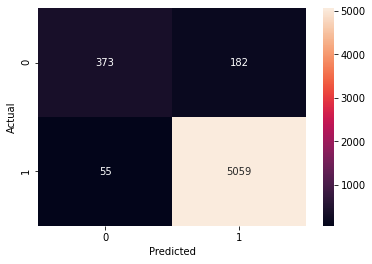

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_eval, preds)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Train on Full training dataset

In [ ]:
model.fit(features, labels, categorical_features_indices)

0:	learn: 0.6471641	total: 89.4ms	remaining: 2m 58s
1:	learn: 0.6096882	total: 171ms	remaining: 2m 50s
2:	learn: 0.5731865	total: 250ms	remaining: 2m 46s
3:	learn: 0.5398463	total: 329ms	remaining: 2m 44s
4:	learn: 0.5099072	total: 404ms	remaining: 2m 41s
5:	learn: 0.4858881	total: 448ms	remaining: 2m 28s
6:	learn: 0.4623402	total: 534ms	remaining: 2m 32s
7:	learn: 0.4366064	total: 609ms	remaining: 2m 31s
8:	learn: 0.4149223	total: 687ms	remaining: 2m 32s
9:	learn: 0.3941810	total: 758ms	remaining: 2m 30s
10:	learn: 0.3751722	total: 840ms	remaining: 2m 31s
11:	learn: 0.3579695	total: 915ms	remaining: 2m 31s
12:	learn: 0.3434112	total: 987ms	remaining: 2m 30s
13:	learn: 0.3284428	total: 1.06s	remaining: 2m 31s
14:	learn: 0.3142805	total: 1.14s	remaining: 2m 31s
15:	learn: 0.3030355	total: 1.22s	remaining: 2m 31s
16:	learn: 0.2911584	total: 1.31s	remaining: 2m 32s
17:	learn: 0.2807862	total: 1.37s	remaining: 2m 31s
18:	learn: 0.2712582	total: 1.45s	remaining: 2m 31s
19:	learn: 0.2625330	

# Predicting on Test Dataset

In [ ]:
test.shape

(8576, 35)

In [ ]:
test_predictions = model.predict(test)
print(test_predictions)

[1 1 1 ... 1 1 1]


# Submission

In [ ]:
submission_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/faredata/sample_submission.csv", 
                            index_col="tripid")

In [ ]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["prediction"] = test_predictions

submission_df.head()

,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1


In [ ]:
submission_df.shape

(8576, 1)

In [ ]:
submission_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/faredata/catboostclassifier1.csv', index=True)

# Submission with Ensembling

In [ ]:
s1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/faredata/catboostclassifier1.csv')
s2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/faredata/catboostclassifier.csv')
s3 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/faredata/xgbclassifier3.csv')

In [ ]:
sum_column = s1["prediction"]+s2["prediction"]+s3["prediction"]
sum_column

0       3
1       3
2       3
3       3
4       3
       ..
8571    3
8572    3
8573    3
8574    3
8575    3
Name: prediction, Length: 8576, dtype: int64

In [ ]:
sum_column = sum_column/3
sum_column

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
8571    1.0
8572    1.0
8573    1.0
8574    1.0
8575    1.0
Name: prediction, Length: 8576, dtype: float64

In [ ]:
sub_df = pd.DataFrame(sum_column, columns=["prediction"])
sub_df.index = s1["tripid"]
sub_df.head()

,prediction
tripid,
213284604,1.0
213286352,1.0
213293973,1.0
213294622,1.0
213298687,1.0


In [ ]:
sub_df.loc[(sub_df["prediction"]>0.5),"prediction"] = 1
sub_df.loc[(sub_df["prediction"]<=0.5),"prediction"] = 0
sub_df.head()

,prediction
tripid,
213284604,1.0
213286352,1.0
213293973,1.0
213294622,1.0
213298687,1.0


In [ ]:
sub_df["prediction"] = sub_df["prediction"].astype(int)
sub_df.head()

,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1


In [ ]:
sub_df.shape

(8576, 1)

In [ ]:
sub_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/faredata/ensembledsubmission.csv', index=True)